In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import altair as alt
import json

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = 'CDPH_Environmental_Complaints.csv'
complaints_df = pd.read_csv(file_path)
complaints_df['COMPLAINT TYPE'] = complaints_df['COMPLAINT TYPE'].str.lower()

print(complaints_df.columns)

print(complaints_df.head(10))

inspector_df = complaints_df[['INSPECTOR', 'COMPLAINT TYPE', 'LOCATION']]

inspector_df['LATITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
inspector_df['LONGITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))
inspector_df['geometry'] = inspector_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)
inspector_gdf = gpd.GeoDataFrame(inspector_df, geometry='geometry')
print(inspector_gdf)

Index(['COMPLAINT ID', 'COMPLAINT TYPE', 'ADDRESS', 'STREET NUMBER FROM',
       'STREET NUMBER TO', 'DIRECTION', 'STREET NAME', 'STREET TYPE',
       'INSPECTOR', 'COMPLAINT DATE', 'COMPLAINT DETAIL', 'INSPECTION LOG',
       'DATA SOURCE', 'Modified Date', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')
  COMPLAINT ID                             COMPLAINT TYPE  \
0    DOECOMP43                            noise complaint   
1   DOECOMP186                   air pollution work order   
2   DOECOMP192                            noise complaint   
3   DOECOMP229                   air pollution work order   
4   DOECOMP321                   air pollution work order   
5   DOECOMP334  service stations/storage tanks work order   
6   DOECOMP348                   air pollution work order   
7   DOECOMP390                   air pollution work order   
8   DOECOMP457                 illegal dumping work order   
9   DOECOMP620                        asbestos work order   

         

C:\Users\Arka\AppData\Local\Temp\ipykernel_31024\1904158626.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['LATITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
C:\Users\Arka\AppData\Local\Temp\ipykernel_31024\1904158626.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['LONGITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))


      INSPECTOR               COMPLAINT TYPE  \
0            25              noise complaint   
1           110     air pollution work order   
2            25              noise complaint   
3            25     air pollution work order   
4            16     air pollution work order   
...         ...                          ...   
57543    417325              noise complaint   
57544    425726  construction and demolition   
57545     10937     air pollution work order   
57546    417325              noise complaint   
57547     84397  construction and demolition   

                                 LOCATION   LATITUDE  LONGITUDE  \
0       POINT (-87.62682903 41.882436002) -87.626829  41.882436   
1      POINT (-87.662404034 41.882840594) -87.662404  41.882841   
2      POINT (-87.627968681 41.883306002) -87.627969  41.883306   
3      POINT (-87.652662977 41.883340996) -87.652663  41.883341   
4      POINT (-87.653183459 41.909700862) -87.653183  41.909701   
...                  

C:\Users\Arka\AppData\Local\Temp\ipykernel_31024\1904158626.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['geometry'] = inspector_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)


In [3]:
chicago_geojson = "Communities-Chicago.geojson"
chicago_gdf = gpd.read_file(chicago_geojson)
inspector_gdf.crs = 'EPSG:4326'
chicago_gdf.crs = 'EPSG:4326'

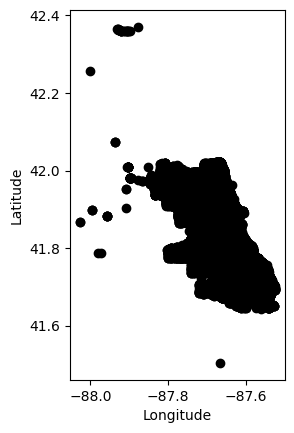

In [4]:
chicago_gdf = chicago_gdf.unary_union
chicago_gdf = gpd.GeoDataFrame(geometry=[chicago_gdf])
fig, ax = plt.subplots()
inspector_gdf.plot(ax=ax, color='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')
plt.show()



C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\3265769200.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  chicago_inspector_gdf = gpd.sjoin(inspector_gdf, chicago_gdf,op='within')


      INSPECTOR               COMPLAINT TYPE   LATITUDE  LONGITUDE  \
0            25              noise complaint -87.626829  41.882436   
1           110     air pollution work order -87.662404  41.882841   
2            25              noise complaint -87.627969  41.883306   
3            25     air pollution work order -87.652663  41.883341   
4            16     air pollution work order -87.653183  41.909701   
...         ...                          ...        ...        ...   
57543    417325              noise complaint -87.641998  41.881096   
57544    425726  construction and demolition -87.626664  41.699623   
57545     10937     air pollution work order -87.557534  41.713027   
57546    417325              noise complaint -87.668867  42.017369   
57547     84397  construction and demolition -87.757848  41.942554   

                         geometry  
0      POINT (-87.62683 41.88244)  
1      POINT (-87.66240 41.88284)  
2      POINT (-87.62797 41.88331)  
3      POINT (-

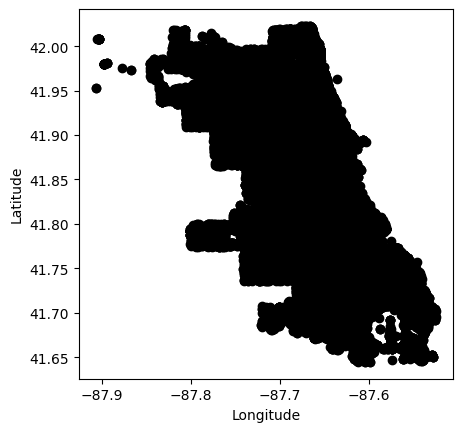

In [5]:
#print(chicago_gdf)

chicago_inspector_gdf = gpd.sjoin(inspector_gdf, chicago_gdf,op='within')
chicago_inspector_gdf = chicago_inspector_gdf.drop(columns=['LOCATION', 'index_right'])
print(chicago_inspector_gdf)
fig, ax = plt.subplots()
chicago_inspector_gdf.plot(ax=ax, color='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')
plt.show()


In [6]:
complaint_type_counts = chicago_inspector_gdf.groupby('INSPECTOR')['COMPLAINT TYPE'].count().reset_index()
print(complaint_type_counts)

    INSPECTOR  COMPLAINT TYPE
0          10             353
1         101              81
2         102             208
3       10937            2435
4          11            1626
..        ...             ...
144   EN00114               2
145   EN00122               4
146   EN00134               8
147   EN00188               1
148   EN00252               1

[149 rows x 2 columns]


In [7]:

# Create the Altair bar chart
chart = alt.Chart(complaint_type_counts).mark_bar().encode(
    x=alt.X('INSPECTOR:N', title='Inspector'),
    y=alt.Y('COMPLAINT TYPE:Q', title='Total Complaint Types')
).properties(
    width=600,
    height=400,
    title='Total Complaint Types per Inspector'
)

# Rotate x-axis labels for better readability
chart = chart.configure_axisX(labelAngle=-90)

# Show the chart
chart.display()

alt.Chart(...)

In [8]:
print(chicago_inspector_gdf)

      INSPECTOR               COMPLAINT TYPE   LATITUDE  LONGITUDE  \
0            25              noise complaint -87.626829  41.882436   
1           110     air pollution work order -87.662404  41.882841   
2            25              noise complaint -87.627969  41.883306   
3            25     air pollution work order -87.652663  41.883341   
4            16     air pollution work order -87.653183  41.909701   
...         ...                          ...        ...        ...   
57543    417325              noise complaint -87.641998  41.881096   
57544    425726  construction and demolition -87.626664  41.699623   
57545     10937     air pollution work order -87.557534  41.713027   
57546    417325              noise complaint -87.668867  42.017369   
57547     84397  construction and demolition -87.757848  41.942554   

                         geometry  
0      POINT (-87.62683 41.88244)  
1      POINT (-87.66240 41.88284)  
2      POINT (-87.62797 41.88331)  
3      POINT (-

In [9]:

min_lat = chicago_inspector_gdf['LATITUDE'].min()
max_lat = chicago_inspector_gdf['LATITUDE'].max()
min_lon = chicago_inspector_gdf['LONGITUDE'].min()
max_lon = chicago_inspector_gdf['LONGITUDE'].max()

geojson_chart = alt.Chart(chicago_gdf).mark_geoshape(
    fill='lightgray',  # You can set the fill color
    stroke='black',    # You can set the stroke color
).project('identity')

# Create the first bar chart (inspector vs. total complaint types)
bar_chart = alt.Chart(complaint_type_counts).mark_bar().encode(
    x='INSPECTOR:N',
    y='COMPLAINT TYPE:Q',
    tooltip=['INSPECTOR:N', 'COMPLAINT TYPE:Q']
).properties(
    width=900,
    height=300,
    title='Total Complaint Types per Inspector'
)

# Create a selection for the first chart
selection = alt.selection_single(fields=['INSPECTOR'])
print(selection)
# Apply the selection to the first chart
bar_chart = bar_chart.add_selection(selection)

scatterplot = alt.Chart(chicago_inspector_gdf).mark_circle(size=60, color='blue').encode(
    x=alt.X('LATITUDE:Q', scale=alt.Scale(domain=[min_lat, max_lat])),
    y=alt.Y('LONGITUDE:Q', scale=alt.Scale(domain=[min_lon, max_lon])),
    color='COMPLAINT TYPE:N',
    tooltip=['INSPECTOR:N', 'COMPLAINT TYPE:N']
).transform_filter(
    selection
).properties(
    width=400,
    height=300,
    title='Complaint Locations'
)


# Combine both charts
combined_chart = alt.hconcat(bar_chart, scatterplot)

# Display the combined chart
combined_chart.display()

Parameter('param_1', SelectionParameter({
  name: 'param_1',
  select: PointSelectionConfig({
    fields: ['INSPECTOR'],
    type: 'point'
  })
}))


C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [10]:
# with open("../vega_lite/linked_charts/linked_histogram_choropleth/linked_histogram_choropleth_raw_files.json", "w") as f:
#     f.write(json.dumps(combined_chart.to_dict(), indent=4))

# with open("../JSON/linked_histogram_choropleth_chicago_gdf.json", "w") as f:
#     f.write(chicago_gdf.to_json(indent=4))

# with open("../JSON/linked_histogram_choropleth_complaint_type_counts.json", "w") as f:
#     f.write(complaint_type_counts.to_json(indent=4))

# with open("../JSON/linked_histogram_choropleth_chicago_inspector_gdf.json", "w") as f:
#     f.write(chicago_inspector_gdf.toson(indent=4))

In [11]:
street_df = complaints_df[['STREET TYPE', 'COMPLAINT TYPE', 'LOCATION']]
street_df['LATITUDE'] = street_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
street_df['LONGITUDE'] = street_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))
street_df['geometry'] = street_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)
street_gdf = gpd.GeoDataFrame(street_df, geometry='geometry')
print(street_df)

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\2939600449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_df['LATITUDE'] = street_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\2939600449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_df['LONGITUDE'] = street_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))


      STREET TYPE               COMPLAINT TYPE  \
0              ST              noise complaint   
1              ST     air pollution work order   
2              ST              noise complaint   
3              ST     air pollution work order   
4              ST     air pollution work order   
...           ...                          ...   
57543          ST              noise complaint   
57544          ST  construction and demolition   
57545          ST     air pollution work order   
57546         AVE              noise complaint   
57547          ST  construction and demolition   

                                 LOCATION   LATITUDE  LONGITUDE  \
0       POINT (-87.62682903 41.882436002) -87.626829  41.882436   
1      POINT (-87.662404034 41.882840594) -87.662404  41.882841   
2      POINT (-87.627968681 41.883306002) -87.627969  41.883306   
3      POINT (-87.652662977 41.883340996) -87.652663  41.883341   
4      POINT (-87.653183459 41.909700862) -87.653183  41.909701 

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\2939600449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_df['geometry'] = street_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)


C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


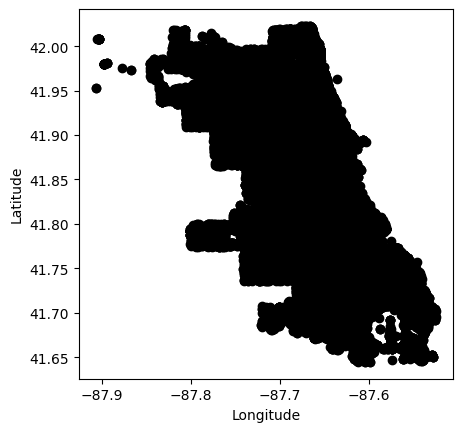

In [12]:
chicago_street_gdf = gpd.sjoin(street_gdf, chicago_gdf,op='within')
chicago_street_gdf = chicago_street_gdf.drop(columns=['LOCATION', 'index_right'])
fig, ax = plt.subplots()
chicago_street_gdf.plot(ax=ax, color='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')
plt.show()

In [13]:
street_type_counts = chicago_street_gdf.groupby('STREET TYPE')['COMPLAINT TYPE'].count().reset_index()
print(street_type_counts)

   STREET TYPE  COMPLAINT TYPE
0          AVE           30194
1         BLVD             686
2           CT             172
3           DR            1014
4         EXPY              10
5          HWY             320
6         PKWY             172
7           PL            1306
8          PLZ              32
9           RD            2317
10          ST           20331
11         TER             106


In [14]:
print(chicago_inspector_gdf)

      INSPECTOR               COMPLAINT TYPE   LATITUDE  LONGITUDE  \
0            25              noise complaint -87.626829  41.882436   
1           110     air pollution work order -87.662404  41.882841   
2            25              noise complaint -87.627969  41.883306   
3            25     air pollution work order -87.652663  41.883341   
4            16     air pollution work order -87.653183  41.909701   
...         ...                          ...        ...        ...   
57543    417325              noise complaint -87.641998  41.881096   
57544    425726  construction and demolition -87.626664  41.699623   
57545     10937     air pollution work order -87.557534  41.713027   
57546    417325              noise complaint -87.668867  42.017369   
57547     84397  construction and demolition -87.757848  41.942554   

                         geometry  
0      POINT (-87.62683 41.88244)  
1      POINT (-87.66240 41.88284)  
2      POINT (-87.62797 41.88331)  
3      POINT (-

In [15]:
min_lat = chicago_inspector_gdf['LATITUDE'].min()
max_lat = chicago_inspector_gdf['LATITUDE'].max()
min_lon = chicago_inspector_gdf['LONGITUDE'].min()
max_lon = chicago_inspector_gdf['LONGITUDE'].max()

geojson_chart = alt.Chart(chicago_gdf).mark_geoshape(
    fill='lightgray',  # You can set the fill color
    stroke='black',    # You can set the stroke color
).project('identity')



pie_chart = alt.Chart(street_type_counts).mark_arc().encode(
    theta='COMPLAINT TYPE:Q',  # Use 'COMPLAINT TYPE' as the values for the angles
    color=alt.Color('STREET TYPE:N', scale=alt.Scale(scheme='category20')),   # Use 'STREET TYPE' for color encoding
    tooltip=['STREET TYPE:N', 'COMPLAINT TYPE:N']  # Display labels and values on hover
).properties(
    width=300,
    height=300,
    title='Complaints by Street Type'
)

selection = alt.selection_single(fields=['STREET TYPE'])
print(selection)
# Apply the selection to the first chart
pie_chart = pie_chart.add_selection(selection)


scatterplot = alt.Chart(chicago_street_gdf).mark_circle(size=60, color='blue').encode(
    x=alt.X('LATITUDE:Q', scale=alt.Scale(domain=[min_lat, max_lat])),
    y=alt.Y('LONGITUDE:Q', scale=alt.Scale(domain=[min_lon, max_lon])),
    color='COMPLAINT TYPE:N',
    tooltip=['STREET TYPE:N', 'COMPLAINT TYPE:N']
).transform_filter(
    selection
).properties(
    width=300,
    height=300,
    title='Complaint Locations'
)


# Combine both charts
combined_chart = alt.hconcat(pie_chart, scatterplot)

# Display the combined chart
combined_chart.display()

# with open("linked_charts/linked_pie_scatter/linked_pie_scatter_raw_files.json", "w") as f:
#     f.write(json.dumps(combined_chart.to_dict(), indent=4))

# with open("../JSON/linked_pie_scatter_chicago_street_gdf.json", "w") as f:
#     f.write(chicago_street_gdf.to_json(indent=4))

# with open("../JSON/linked_pie_scatter_chicago_street_type_counts.json", "w") as f:
#     f.write(street_type_counts.to_json(indent=4))

Parameter('param_2', SelectionParameter({
  name: 'param_2',
  select: PointSelectionConfig({
    fields: ['STREET TYPE'],
    type: 'point'
  })
}))


C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [16]:

month_df = complaints_df[['COMPLAINT ID','COMPLAINT DATE', 'COMPLAINT TYPE']]
print(month_df)

      COMPLAINT ID COMPLAINT DATE               COMPLAINT TYPE
0        DOECOMP43     11/25/1994              noise complaint
1       DOECOMP186     08/19/2008     air pollution work order
2       DOECOMP192     05/03/1996              noise complaint
3       DOECOMP229     05/08/1996     air pollution work order
4       DOECOMP321     08/30/1995     air pollution work order
...            ...            ...                          ...
57543    601266711     11/02/2022              noise complaint
57544    601305455     02/14/2023  construction and demolition
57545    601355419     05/15/2023     air pollution work order
57546    601261956     10/24/2022              noise complaint
57547    601437103     09/19/2023  construction and demolition

[57548 rows x 3 columns]


In [17]:
# Assuming you have a DataFrame named 'df' with a 'COMPLAINT DATE' column in datetime format
month_df['COMPLAINT DATE'] = pd.to_datetime(month_df['COMPLAINT DATE'])

# Extract month and year
month_df['Year'] = month_df['COMPLAINT DATE'].dt.year
month_df['Month'] = month_df['COMPLAINT DATE'].dt.month

year_2000_data = month_df[month_df['Year'] == 2000]

print(year_2000_data)



# Group the data by 'Month' and count complaints
monthly_complaint_counts = year_2000_data.groupby('Month')['COMPLAINT TYPE'].count().reset_index()

# Rename columns for clarity
monthly_complaint_counts.columns = ['Month', 'Total Complaints']

# Display the resulting DataFrame
#print(monthly_complaint_counts)


stacked_complaint_counts = year_2000_data.groupby(['Month', 'COMPLAINT TYPE']).size().reset_index(name='Count')
print(stacked_complaint_counts)


       COMPLAINT ID COMPLAINT DATE                             COMPLAINT TYPE  \
5        DOECOMP334     2000-11-30  service stations/storage tanks work order   
8        DOECOMP457     2000-10-27                 illegal dumping work order   
14      DOECOMP1106     2000-08-08                 illegal dumping work order   
58      DOECOMP5193     2000-03-14                   air pollution work order   
60      DOECOMP5386     2000-06-21      toxics hazardous materials work order   
...             ...            ...                                        ...   
44702  DOECOMP36974     2000-08-17                   air pollution work order   
44705  DOECOMP37510     2000-04-06                                      other   
44732  DOECOMP36506     2000-01-18                            noise complaint   
44754  DOECOMP35511     2000-09-07      toxics hazardous materials work order   
44765  DOECOMP38353     2000-05-08                            noise complaint   

         Year  Month  
5   

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1173946471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['COMPLAINT DATE'] = pd.to_datetime(month_df['COMPLAINT DATE'])
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1173946471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['Year'] = month_df['COMPLAINT DATE'].dt.year
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1173946471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [18]:

radial_chart = alt.Chart(monthly_complaint_counts).mark_arc(innerRadius = 100).encode(
    theta='Total Complaints:Q',  # Radius depends on complaint count
    color=alt.Color('Month:N', scale=alt.Scale(scheme='category20'), title='Month'),  # Color arcs by month
    opacity=alt.value(0.8),  # Set opacity for the arcs
    tooltip=['Month:N', 'Total Complaints:Q']
).properties(
    width=400,
    height=400,
    title='Radial Chart of Complaints by Month for the year 2000'
)


radial_chart.display()
selection = alt.selection_single(fields=['Month'])
print(selection)
# Apply the selection to the first chart
radial_chart = radial_chart.add_selection(selection)

print(stacked_complaint_counts)

# Create a bar chart
bar_chart = alt.Chart(stacked_complaint_counts).mark_bar().encode(
    x='COMPLAINT TYPE:N',
    y='Count:Q',
    color='COMPLAINT TYPE:N',
    tooltip=['COMPLAINT TYPE:N', 'Count:Q']
).transform_filter(
    selection
).properties(
    width=400,
    height=400,
    title='Bar Chart of Complaint Types by Month'
)



# Combine both charts
combined_chart = alt.hconcat(radial_chart,bar_chart)
# Show the bar chart
combined_chart.display()

# with open("linked_charts/linked_donut_bar/linked_donut_bar_raw_files.json", "w") as f:
#     f.write(json.dumps(combined_chart.to_dict(), indent=4))

# with open("../JSON/linked_donut_bar_monthly_complaint_counts.json", "w") as f:
#     f.write(monthly_complaint_counts.to_json(indent=4))

# with open("../JSON/linked_donut_bar_stacked_complaint_counts.json", "w") as f:
#     f.write(stacked_complaint_counts.to_json(indent=4))


alt.Chart(...)

Parameter('param_3', SelectionParameter({
  name: 'param_3',
  select: PointSelectionConfig({
    fields: ['Month'],
    type: 'point'
  })
}))
     Month                             COMPLAINT TYPE  Count
0      1.0                   air pollution work order     36
1      1.0                        asbestos work order     13
2      1.0                 illegal dumping work order     25
3      1.0                            noise complaint     22
4      1.0                                      other      6
..     ...                                        ...    ...
101   12.0                                      other     11
102   12.0           permits issued by doe work order      3
103   12.0                       recycling work order      2
104   12.0  service stations/storage tanks work order      7
105   12.0      toxics hazardous materials work order     22

[106 rows x 3 columns]


C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [19]:

inspector_df = complaints_df[['LOCATION','COMPLAINT TYPE', 'COMPLAINT DATE', 'INSPECTOR', 'Modified Date','DATA SOURCE']]

inspector_df['LATITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
inspector_df['LONGITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))
inspector_df['geometry'] = inspector_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)
inspector_gdf = gpd.GeoDataFrame(inspector_df, geometry='geometry')

inspector_gdf = inspector_gdf[inspector_gdf['DATA SOURCE'] != 'HISTORIC DEPT. OF ENVIRONMENT']

# Convert 'COMPLAINT DATE' and 'Modified Date' to datetime objects
inspector_gdf['COMPLAINT DATE'] = pd.to_datetime(inspector_gdf['COMPLAINT DATE'])
inspector_gdf['Modified Date'] = pd.to_datetime(inspector_gdf['Modified Date'])

# Calculate the number of days between the two dates
inspector_gdf['COMPLAINT RESPONSE DAYS'] = (inspector_gdf['Modified Date'] - inspector_gdf['COMPLAINT DATE']).dt.days

print(complaints_df)



C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\804111584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['LATITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[1][1:]))
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\804111584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['LONGITUDE'] = inspector_df['LOCATION'].apply(lambda x: float(x.split()[2][:-1]))


      COMPLAINT ID               COMPLAINT TYPE               ADDRESS  \
0        DOECOMP43              noise complaint          1 N STATE ST   
1       DOECOMP186     air pollution work order       100 N LOOMIS ST   
2       DOECOMP192              noise complaint        100 N STATE ST   
3       DOECOMP229     air pollution work order  1000 W WASHINGTON ST   
4       DOECOMP321     air pollution work order        1001 W WEED ST   
...            ...                          ...                   ...   
57543    601266711              noise complaint      555 W MADISON ST   
57544    601305455  construction and demolition        125 W 107TH ST   
57545    601355419     air pollution work order       2701 E 100TH ST   
57546    601261956              noise complaint      1512 W FARGO AVE   
57547    601437103  construction and demolition      5224 W ROSCOE ST   

       STREET NUMBER FROM  STREET NUMBER TO DIRECTION STREET NAME STREET TYPE  \
0                       1               Na

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\804111584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspector_df['geometry'] = inspector_df.apply(lambda row: Point(row['LATITUDE'], row['LONGITUDE']), axis=1)


In [20]:
inspector_response_days = inspector_gdf.groupby('INSPECTOR')['COMPLAINT RESPONSE DAYS'].mean().reset_index()

# Sort the data by mean response days in descending order
inspector_response_days = inspector_response_days.sort_values(by='COMPLAINT RESPONSE DAYS', ascending=False)

# Create a bar chart using Altair
bar_chart = alt.Chart(inspector_response_days).mark_bar().encode(
    x=alt.X('INSPECTOR:N', title='Inspector'),
    y=alt.Y('COMPLAINT RESPONSE DAYS:Q', title='Complaint Response Days'),
    tooltip=['INSPECTOR:N', 'COMPLAINT RESPONSE DAYS:Q']
).properties(
    width=400,
    height=300,
    title='Complaint Response Days by Inspector (less is better)'
)

selection = alt.selection_single(fields=['INSPECTOR'])
print(selection)
# Apply the selection to the first chart
bar_chart = bar_chart.add_selection(selection)


scatterplot = alt.Chart(chicago_inspector_gdf).mark_circle(size=60, color='blue').encode(
    x=alt.X('LATITUDE:Q', scale=alt.Scale(domain=[min_lat, max_lat])),
    y=alt.Y('LONGITUDE:Q', scale=alt.Scale(domain=[min_lon, max_lon])),
    color='COMPLAINT TYPE:N',
    tooltip=['COMPLAINT TYPE:N']
).transform_filter(
    selection
).properties(
    width=400,
    height=300,
    title='Complaint Locations'
)


# Combine both charts
combined_chart = alt.hconcat(bar_chart, scatterplot)

# Display the combined chart
combined_chart.display()

# with open("linked_charts/linked_histogram_scatter/linked_histogram_scatter_raw_files.json", "w") as f:
#     f.write(json.dumps(combined_chart.to_dict(), indent=4))

# with open("../JSON/linked_histogram_scatter_inspector_response_days.json", "w") as f:
#     f.write(inspector_response_days.to_json(indent=4))

# with open("../JSON/linked_histogram_scatter_chicago_inspector_gdf.json", "w") as f:
#     f.write(chicago_inspector_gdf.to_json(indent=4))

C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


Parameter('param_4', SelectionParameter({
  name: 'param_4',
  select: PointSelectionConfig({
    fields: ['INSPECTOR'],
    type: 'point'
  })
}))


alt.HConcatChart(...)

In [21]:
#line chart  
#depart 1 vs department 2 
dept_df = complaints_df[['COMPLAINT TYPE', 'COMPLAINT DATE','DATA SOURCE']]


# Convert 'COMPLAINT DATE' and 'Modified Date' to datetime objects
dept_df['COMPLAINT DATE'] = pd.to_datetime(dept_df['COMPLAINT DATE'])


print(dept_df)

                    COMPLAINT TYPE COMPLAINT DATE  \
0                  noise complaint     1994-11-25   
1         air pollution work order     2008-08-19   
2                  noise complaint     1996-05-03   
3         air pollution work order     1996-05-08   
4         air pollution work order     1995-08-30   
...                            ...            ...   
57543              noise complaint     2022-11-02   
57544  construction and demolition     2023-02-14   
57545     air pollution work order     2023-05-15   
57546              noise complaint     2022-10-24   
57547  construction and demolition     2023-09-19   

                         DATA SOURCE  
0      HISTORIC DEPT. OF ENVIRONMENT  
1      HISTORIC DEPT. OF ENVIRONMENT  
2      HISTORIC DEPT. OF ENVIRONMENT  
3      HISTORIC DEPT. OF ENVIRONMENT  
4      HISTORIC DEPT. OF ENVIRONMENT  
...                              ...  
57543         DEPT. OF PUBLIC HEALTH  
57544         DEPT. OF PUBLIC HEALTH  
57545       

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\2253904956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['COMPLAINT DATE'] = pd.to_datetime(dept_df['COMPLAINT DATE'])


In [22]:
# Convert 'COMPLAINT DATE' to datetime format
dept_df['COMPLAINT DATE'] = pd.to_datetime(dept_df['COMPLAINT DATE'])

# Extract the month and year from 'COMPLAINT DATE'
dept_df['Year'] = dept_df['COMPLAINT DATE'].dt.year
dept_df['Month'] = dept_df['COMPLAINT DATE'].dt.month

# Filter data for 'DEPT. OF PUBLIC HEALTH' and 'HISTORIC DEPT. OF ENVIRONMENT'
public_health_data = dept_df[dept_df['DATA SOURCE'] == 'DEPT. OF PUBLIC HEALTH']
environment_data = dept_df[dept_df['DATA SOURCE'] == 'HISTORIC DEPT. OF ENVIRONMENT']

# Group data by month and count the number of complaints
public_health_counts = public_health_data.groupby(['Year', 'Month']).size().reset_index(name='Counts')
environment_counts = environment_data.groupby(['Year', 'Month']).size().reset_index(name='Counts')
public_health_counts['DEPARTMENT'] = 'DEPT. OF PUBLIC HEALTH'
environment_counts['DEPARTMENT'] = 'HISTORIC DEPT. OF ENVIRONMENT'

C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1075804441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['COMPLAINT DATE'] = pd.to_datetime(dept_df['COMPLAINT DATE'])
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1075804441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['Year'] = dept_df['COMPLAINT DATE'].dt.year
C:\Users\Arka\AppData\Local\Temp\ipykernel_24876\1075804441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [23]:
public_health_counts['Functioning Month'] = range(1, len(public_health_counts) + 1)
environment_counts['Functioning Month'] = range(1, len(environment_counts) + 1)
combined_departments = pd.concat([public_health_counts, environment_counts], ignore_index=True)

print(combined_departments)

       Year  Month  Counts                     DEPARTMENT  Functioning Month
0    2011.0    8.0     127         DEPT. OF PUBLIC HEALTH                  1
1    2011.0    9.0     180         DEPT. OF PUBLIC HEALTH                  2
2    2011.0   10.0     138         DEPT. OF PUBLIC HEALTH                  3
3    2011.0   11.0     124         DEPT. OF PUBLIC HEALTH                  4
4    2011.0   12.0      90         DEPT. OF PUBLIC HEALTH                  5
..      ...    ...     ...                            ...                ...
367  2011.0    5.0     128  HISTORIC DEPT. OF ENVIRONMENT                221
368  2011.0    6.0     137  HISTORIC DEPT. OF ENVIRONMENT                222
369  2011.0    7.0     117  HISTORIC DEPT. OF ENVIRONMENT                223
370  2011.0    8.0      59  HISTORIC DEPT. OF ENVIRONMENT                224
371  2011.0    9.0       3  HISTORIC DEPT. OF ENVIRONMENT                225

[372 rows x 5 columns]


In [24]:
# Create a line chart using Altair




In [25]:

# Group by 'DATA SOURCE' and 'COMPLAINT TYPE' and count the occurrences
complaint_dept = dept_df.groupby(['DATA SOURCE', 'COMPLAINT TYPE']).size().reset_index(name='COUNT OF COMPLAINT TYPE FOR DEPARTMENT')

# Rename the 'DATA SOURCE' column to 'DEPARTMENT'
complaint_dept = complaint_dept.rename(columns={'DATA SOURCE': 'DEPARTMENT'})

In [26]:
# Create line charts using Altair

ph_line_chart = alt.Chart(combined_departments).mark_line().encode(
    x=alt.X('Functioning Month:O', title='Functioning Month'),
    y=alt.Y('Counts:Q', title='Number of Counts'),
    color=alt.Color('DEPARTMENT:N', legend=alt.Legend(title='Department')),
    tooltip=['Functioning Month:O']
).properties(
    title='Counts Over Time',
    width=1000,
    height=300
)

selection = alt.selection_single(fields=['DEPARTMENT'])
ph_line_chart = ph_line_chart.add_selection(selection)

bar_chart = alt.Chart(complaint_dept).mark_bar().encode(
    x=alt.X('COMPLAINT TYPE:N', title='Complaint Type'),
    y=alt.Y('COUNT OF COMPLAINT TYPE FOR DEPARTMENT:Q', title='Count of Complaints'),
    color=alt.Color('DEPARTMENT:N', title='Department')
).transform_filter(
    selection
).properties(
    width=1000,
    height=400,
    title='Complaint Types by Department'
)

# Combine both charts
combined_chart = alt.vconcat(ph_line_chart,bar_chart)

# Display the combined chart
combined_chart.display()

# with open("../vega_lite/linked_charts/linked_line_stacked_bar/linked_line_stacked_bar_raw_files.json", "w") as f:
#     f.write(json.dumps(combined_chart.to_dict(), indent=4))

# with open("../JSON/linked_line_stacked_bar_combined_departments.json", "w") as f:
#     f.write(combined_departments.to_json(indent=4))

# with open("../JSON/linked_line_stacked_bar_complaint_department.json", "w") as f:
#     f.write(complaint_dept.to_json(indent=4))

C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\Arka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.VConcatChart(...)

In [27]:




# Display the result
print(result)


NameError: name 'result' is not defined

In [ ]:


bar_chart.display()

alt.Chart(...)